In this example we are going to experiment with another libary called 
ggplot2 ( This is an R-Studio library ) , 
but since it was very useful , python inherited it and calls it plotnine

https://r4ds.had.co.nz/

In [3]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Since we were getting an erro we had to install plotnine
!pip install plotnine

We are going to use data based on fuel economy

In [5]:
# ggplot already has a build-in libary of the most popular cars from 1999 - 2008
from plotnine.data import mpg
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
# We are only interested on these columns
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

In [8]:
fmpg = pd.read_csv('vehicles.csv.zip', usecols=usecols)
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


In [9]:
 # We rename the coloumns in order to have the same name on both dataframes

In [10]:
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


In order to create a graph using ggplot2 we use ggplot() --> This creates a coordinated system

We can then add layers on that

In order to create a scatter plot we add to layers: geom_point() [geometric coordinates]

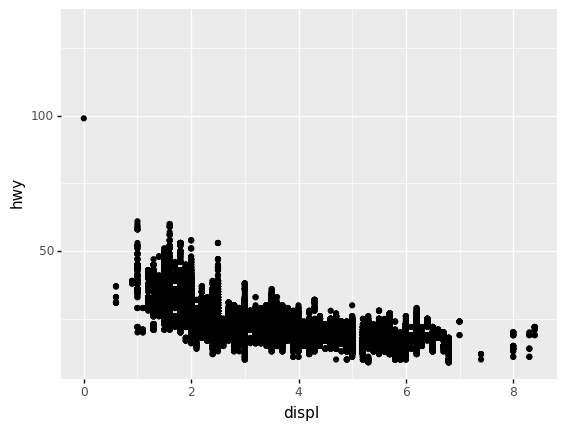

<ggplot: (143424034368)>

In [11]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) # we remore NaNs to avoid getting a warning
    # aes = aesthetics x-axis ; y-axis

In [13]:
# Need to remove the outlier on 100
# If we read through the data , we find out that this outlier is because is an electric car
# hence displ = 0
# Therefore need ot remove it
fmpg.query('displ > 0', inplace=True)

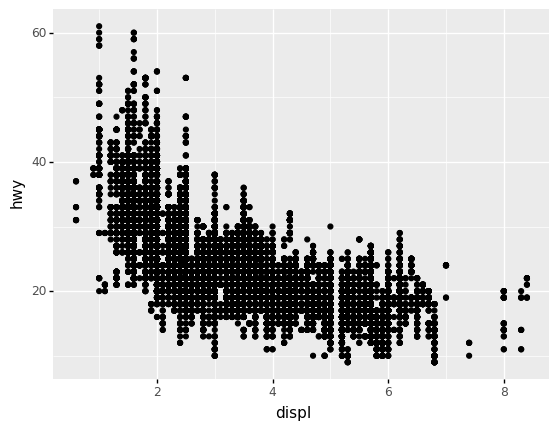

<ggplot: (143427659831)>

In [15]:
# Creating the graph again
ggplot(data=fmpg) + \
  geom_point(mapping = aes(x = 'displ', y = 'hwy'), na_rm=True)

<AxesSubplot:xlabel='displ', ylabel='hwy'>

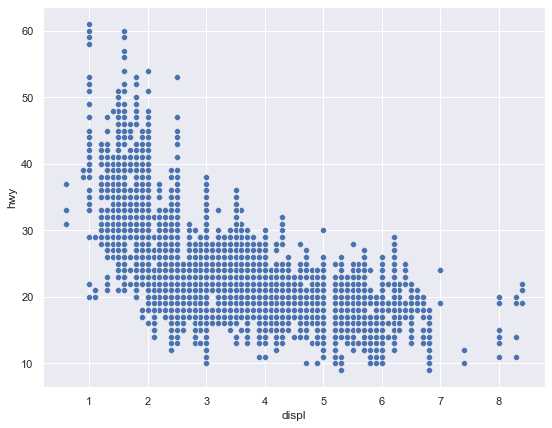

In [16]:
# We can re-create the same graph using seaborn

sns.set_style('dark')
sns.set(rc={'figure.figsize':(9, 7)})
sns.scatterplot(x='displ', y='hwy', data=fmpg)

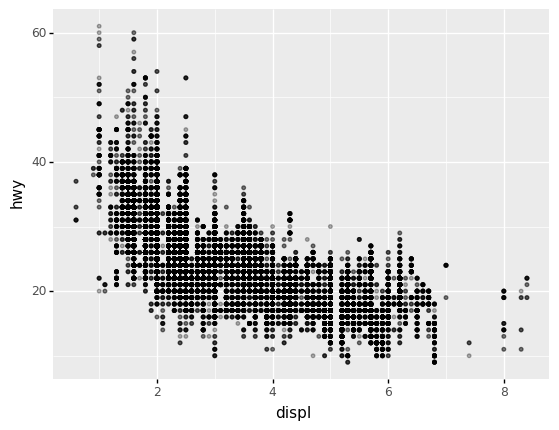

<ggplot: (143425649282)>

In [17]:
# We can change the geom_point parameter
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy'), 
             na_rm=True, size=1, alpha=0.3)

<AxesSubplot:xlabel='displ', ylabel='hwy'>

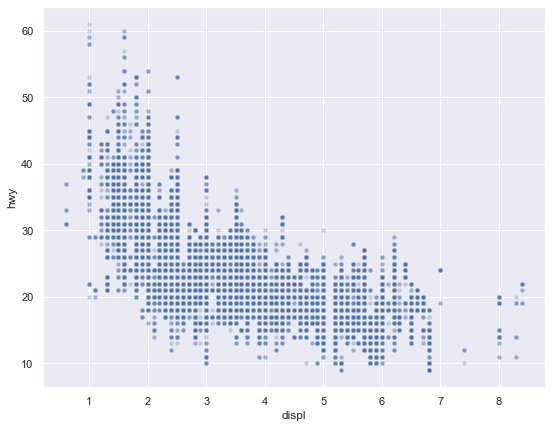

In [18]:
sns.scatterplot(x='displ', y='hwy', s=20, data=fmpg, alpha=0.3)

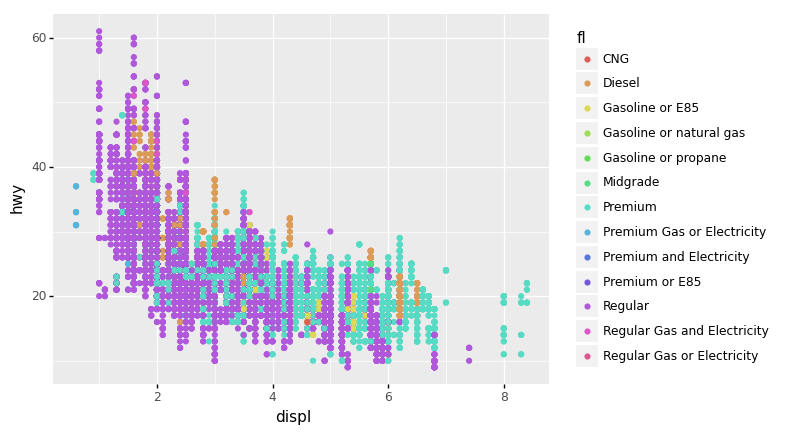

<ggplot: (143423839760)>

In [20]:
# Each geometry needs a mapping -->aes() = aesthetics of the diagram
# Showing also the color for fuel
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='fl'), 
             na_rm=True)

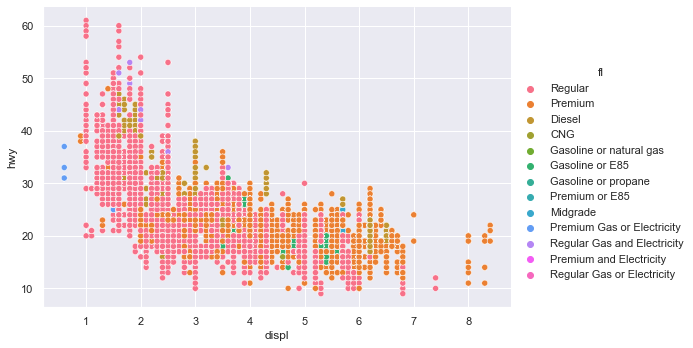

In [21]:
# Same as in seaborn but now color is indicated by hue
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

We can see from the above graph that we have different kinds of fuel

In [22]:
fmpg.groupby('fl').size()

fl
CNG                               60
Diesel                          1231
Gasoline or E85                 1371
Gasoline or natural gas           20
Gasoline or propane                8
Midgrade                         142
Premium                        13206
Premium Gas or Electricity        55
Premium and Electricity          129
Premium or E85                   127
Regular                        27902
Regular Gas and Electricity       77
Regular Gas or Electricity         4
dtype: int64

In [23]:
# Reducing the size of fuel
fmpg.loc[fmpg['fl'].str.startswith('Gasoline'), 'fl'] = 'Gasoline'
fmpg.loc[fmpg['fl'].str.startswith('Premium'), 'fl'] = 'Premium'
fmpg.loc[fmpg['fl'].str.startswith('Regular'), 'fl'] = 'Regular'

fmpg.groupby('fl').size()

fl
CNG            60
Diesel       1231
Gasoline     1399
Midgrade      142
Premium     13517
Regular     27983
dtype: int64

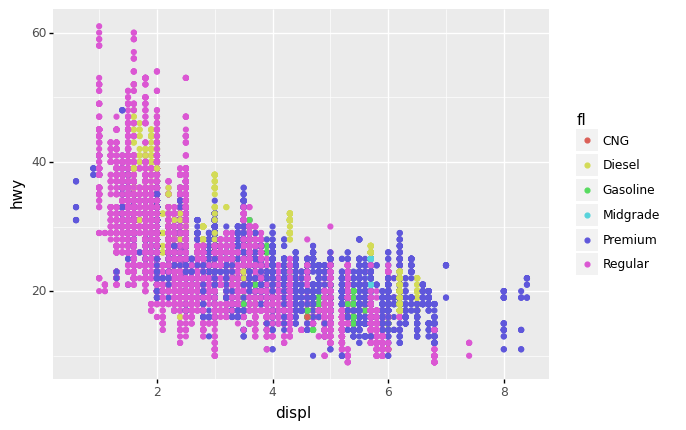

<ggplot: (143425176730)>

In [24]:
# Displaying again the diagram using ggpolot
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy', color='fl'), 
               na_rm=True)

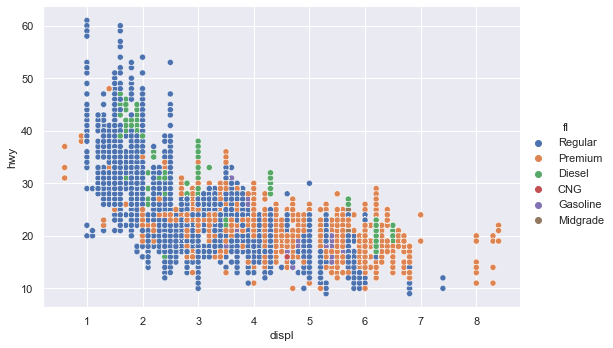

In [25]:
# Seaborn alternative
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

To analyse the data even more we can use the data for class

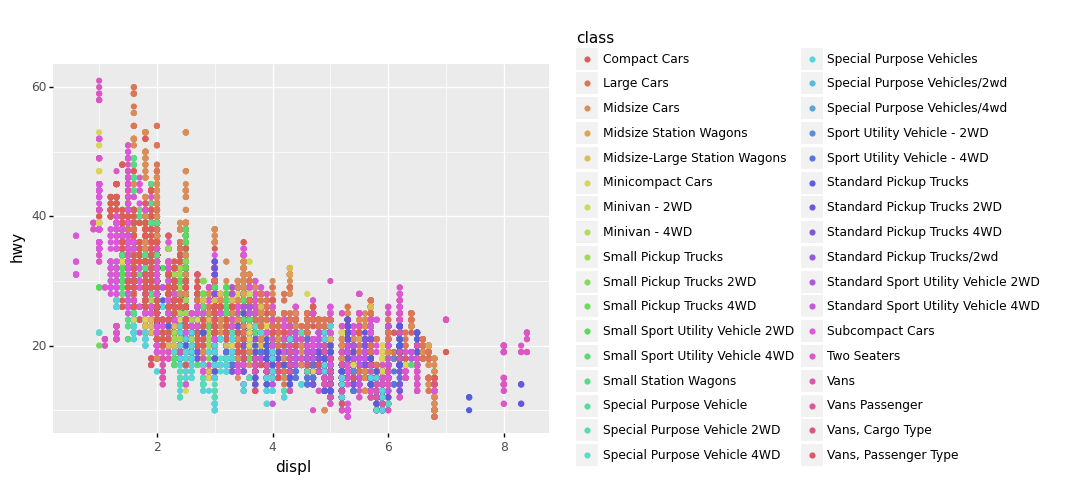

<ggplot: (143425637684)>

In [26]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

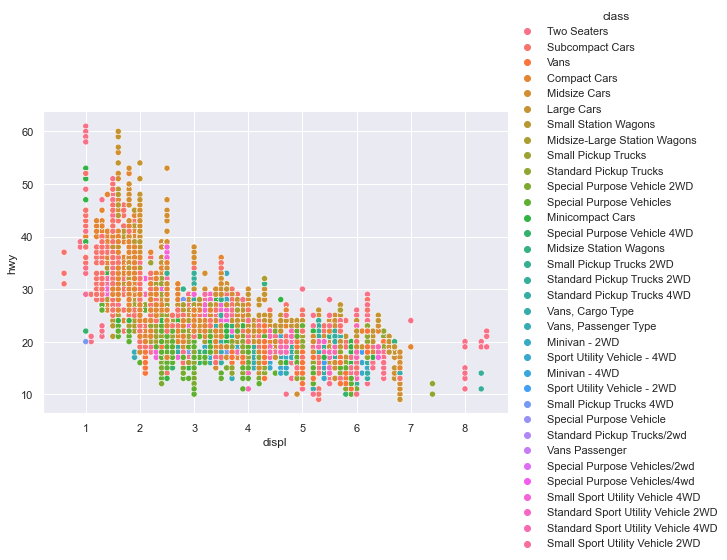

In [27]:
# Same as seaborn
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

Note: As we can see from the above graphs ; ggplot is more intelligent in a way and broke up the key of the graph into 2 coloumns whereas seaborn did not

In [28]:
# Combining the different classes of car
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

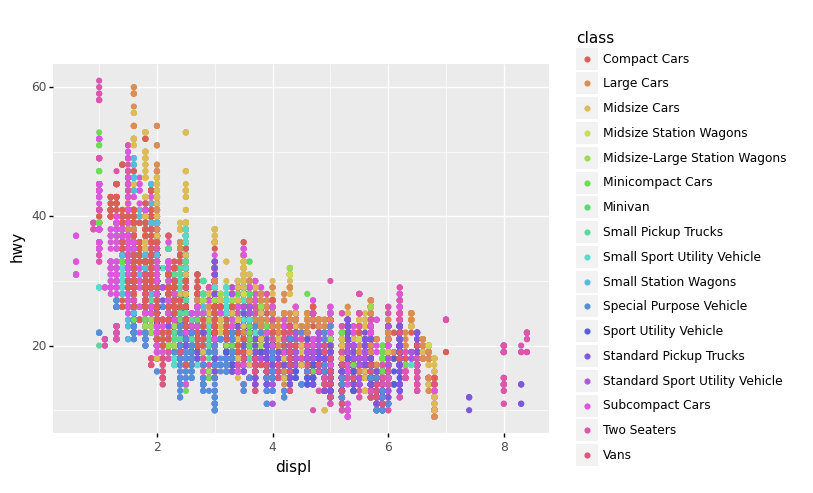

<ggplot: (143424829212)>

In [29]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

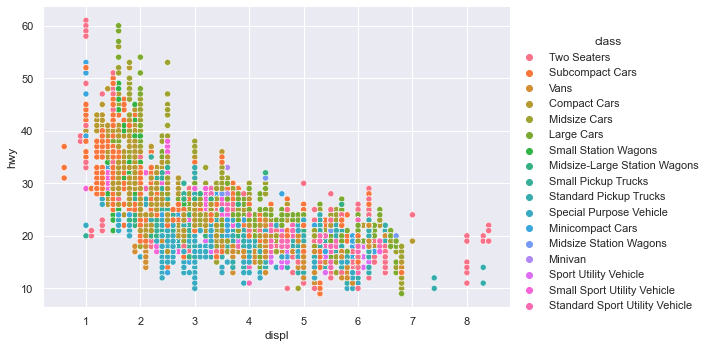

In [30]:
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

We are going now to design a diagram like the above but now for color we will use 'year'

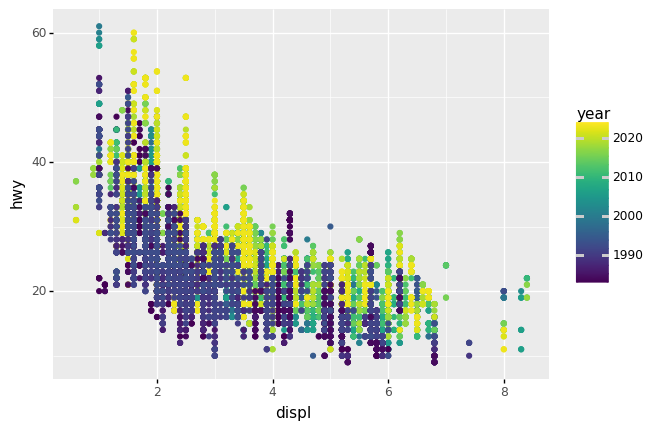

<ggplot: (143432798766)>

In [31]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='year'), 
             na_rm=True)

As the year pass by the fuel color is much lighter , indicating less fuel.
This indicates that the car manufacture technology has imporved , making more efficient cars

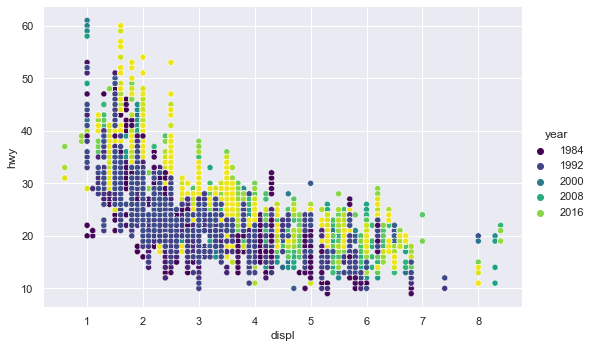

In [33]:
# Seaborn alternative
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis', 
                height=5, aspect=1.5, data=fmpg)

We can see there is a difference between the 2 graphs
Because Seaborn only shows specific color years whereas ggplot shows a range of colors

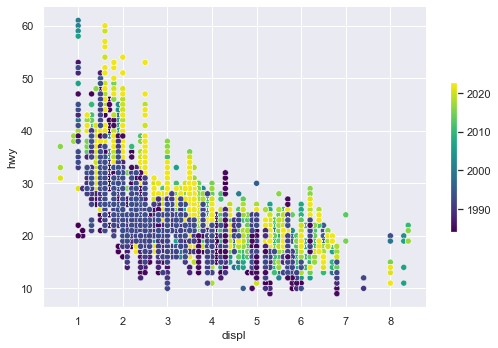

In [34]:
# Solving this issue by creating our color pallet
sns.set_style('dark')
norm = plt.Normalize(fmpg.year.min(), fmpg.year.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis',
                height=5, aspect=1.5, legend=False, data=fmpg)
g.fig.colorbar(sm, shrink=0.5)
plt.grid()

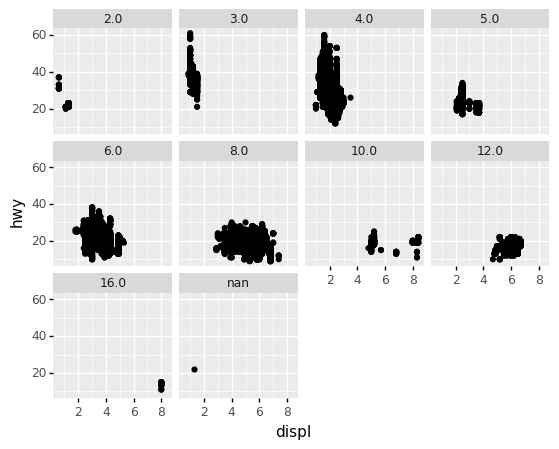

<ggplot: (143441262424)>

In [35]:
# ggplot for different facets
# This creates a sub label of the different cycle
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~cyl')

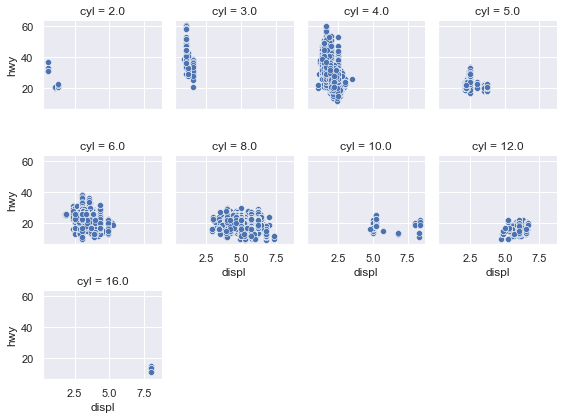

In [36]:
# Seaborn alternative
sns.set_theme()
sns.relplot(x='displ', y='hwy', col='cyl', 
            height=2, aspect=1,
            col_wrap=4, data=fmpg)

As we can see the difference is that seaborn hasnt created a plot for the nan values

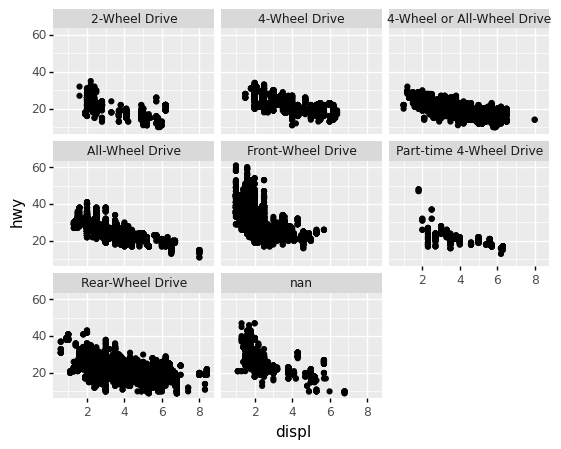

<ggplot: (143425140083)>

In [37]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv') # drive

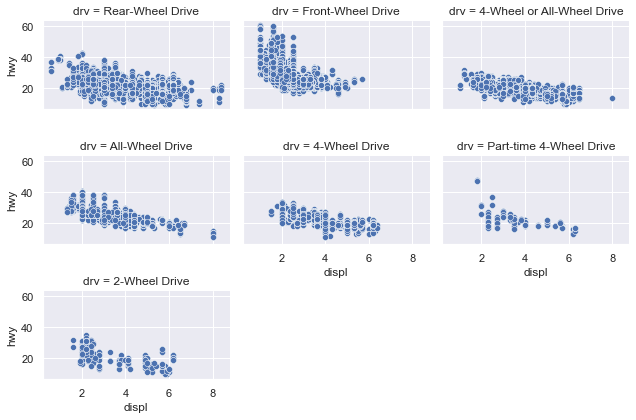

In [38]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=2, aspect=1.5,
            col_wrap=3, data=fmpg)

In [40]:
# Combining different subclasses
fmpg.loc[fmpg['drv'].str.contains('4-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('All-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('2-Wheel', na=False), 'drv'] = '2W'
fmpg.loc[fmpg['drv'].str.contains('Rear-Wheel', na=False), 'drv'] = 'R'
fmpg.loc[fmpg['drv'].str.contains('Front-Wheel', na=False), 'drv'] = 'F'

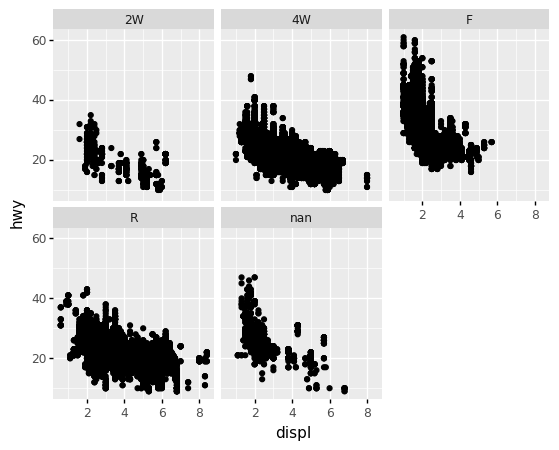

<ggplot: (143439817834)>

In [41]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv')

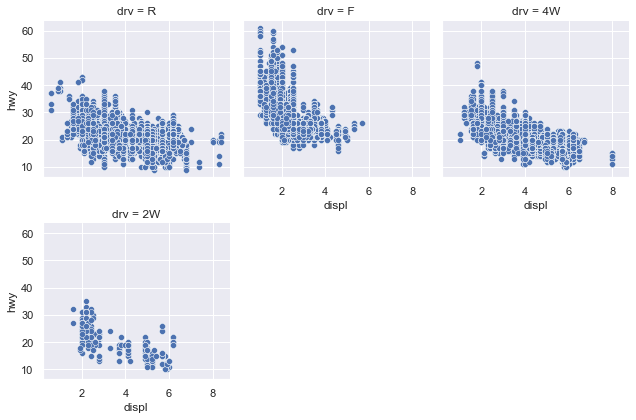

In [42]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=3, aspect=1,
            col_wrap=3, data=fmpg)

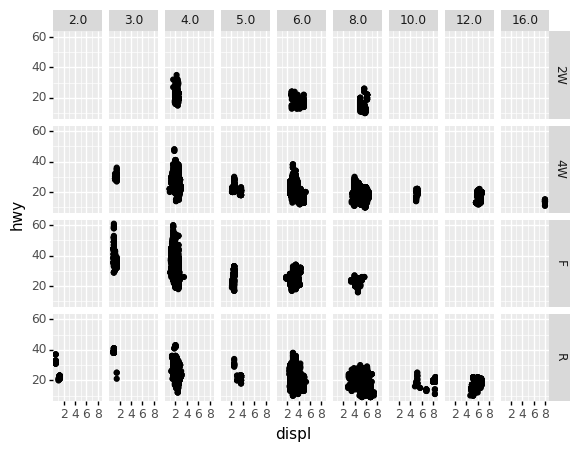

<ggplot: (143425537389)>

In [43]:
# Showing both cyl and drv
ggplot(data = fmpg.query('(cyl == cyl) & (drv == drv)')) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_grid('drv ~ cyl')

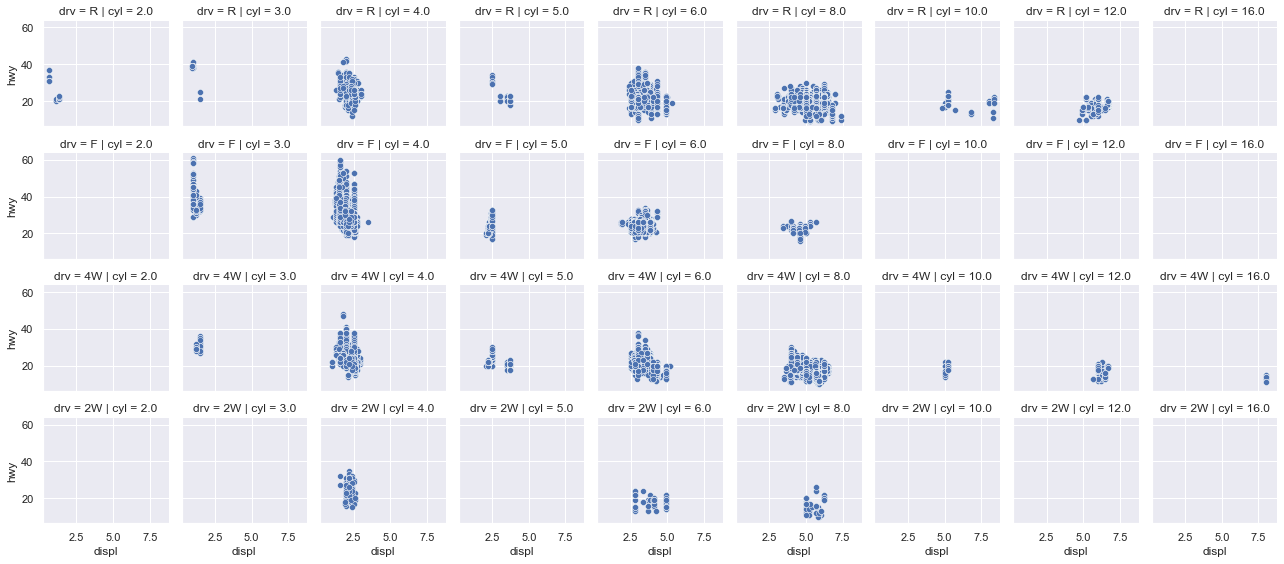

In [44]:
# Seaborn
sns.relplot(x='displ', y='hwy', col='cyl', row='drv', 
            height=2, aspect=1,
            data=fmpg)

Lets go back to the displ and hwy 

Using ggplot we create geometrical properties

Hence we can also add geometrical properties

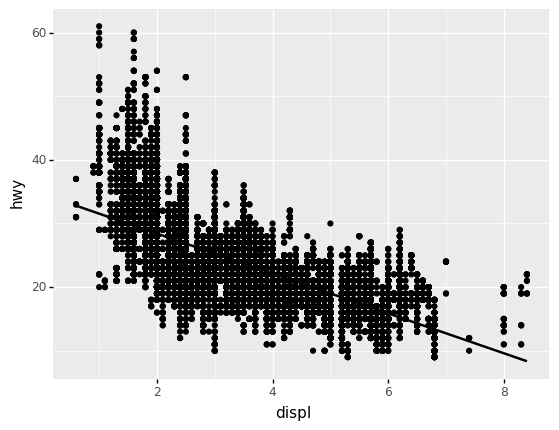

<ggplot: (143440192922)>

In [45]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy')) + \
    geom_smooth(mapping=aes(x = 'displ', y = 'hwy'), stat='smooth')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

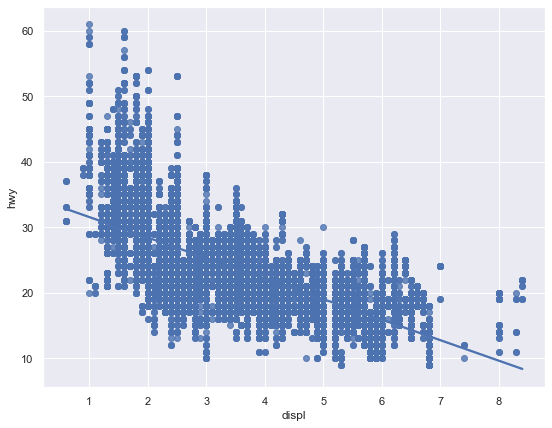

In [46]:
# Seaborn
sns.regplot(x='displ', y='hwy', data=fmpg)

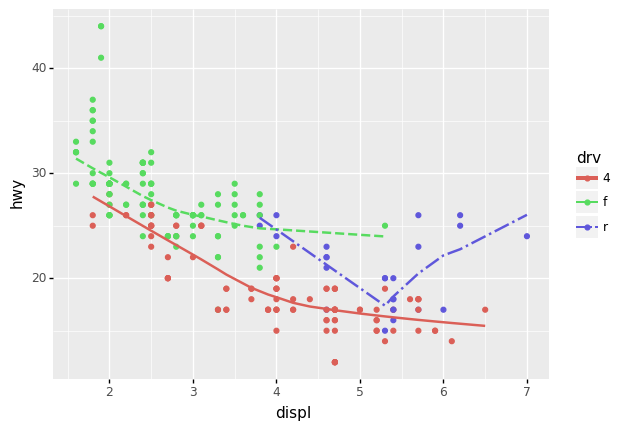

<ggplot: (143434472132)>

In [47]:
# Depending on mapping
ggplot(data=mpg) + \
    geom_point(mapping=aes(x='displ', y ='hwy', color='drv')) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', color='drv', linetype='drv'), se=False)

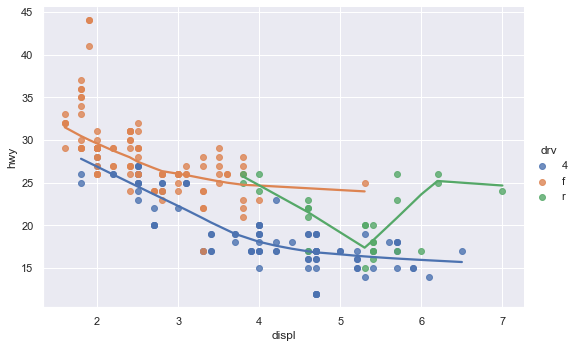

In [48]:
# Seaborn alternative
sns.lmplot(x='displ', y='hwy', hue='drv',
           height=5, aspect=1.5,
           lowess=True,
           data=mpg)

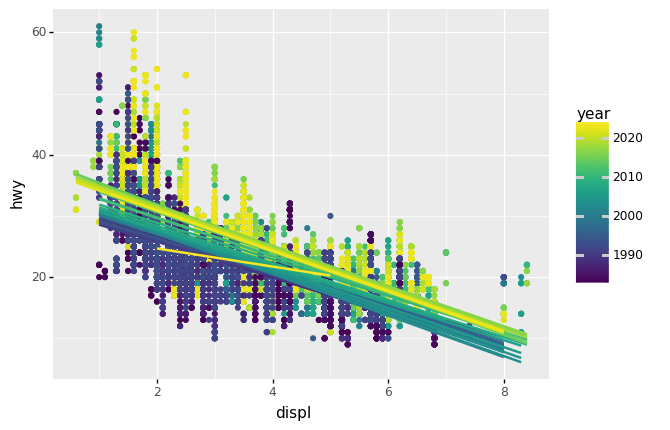

<ggplot: (143426739872)>

In [49]:
# Lets see a better version of the increase in efficiency over time
ggplot(data = fmpg) + \
    geom_point(mapping = aes(x='displ', y='hwy', color='year'), 
               na_rm=True) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', group='year', color='year'),
                se=False)